Solução de Equações Diferenciais
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html#scipy.integrate.ode

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.integrate import odeint

Solução Analítica

In [16]:
t = np.linspace(0, 5, 10)
y_analytical = np.exp(-2 * t)

Solução Numérica

In [17]:
# Define the ODE
def dydt(t, y):
    return -2 * y

# Initial condition
y0 = [1]

In [18]:
# Time span
t_span = (0, 5)
t_eval = np.linspace(t_span[0], t_span[1], 100)

In [19]:
# Solve the ODE
solution = solve_ivp(dydt, t_span, y0, t_eval=t_eval)

Método de Euler

(y(i)-y(i-1))/delta_t = -2*y(i-1)

y(i) = -2*y(i-1)*delta_t + y(i-1)

y(0) = 1

In [20]:
delta_t=0.1
npoints= int(5/delta_t)
y_euler = np.zeros(npoints)
y_euler[0]=1
for i in range(1,npoints):
    y_euler[i] = y_euler[i-1] - 2*delta_t*y_euler[i-1]

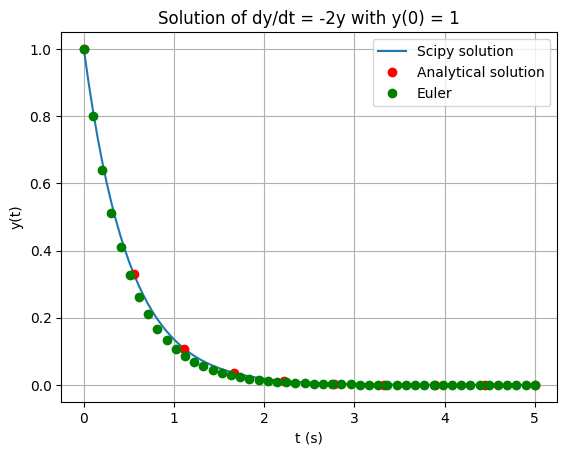

In [27]:
# Plot the solution
plt.plot(solution.t, solution.y[0], label='Scipy solution')
plt.plot(t,y_analytical,'o',label='Analytical solution', color='red')
plt.plot(np.linspace(0,5,npoints),y_euler,'o',label='Euler', color='green')
plt.xlabel('t (s)')
plt.ylabel('y(t)')
plt.title('Solution of dy/dt = -2y with y(0) = 1')
plt.legend()
plt.grid()
plt.show()

Campos de direções

In [22]:
ys1 = odeint(dydt,y0,t_eval)

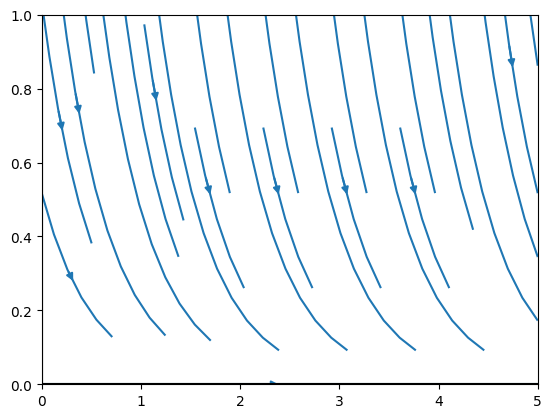

In [28]:
# campo de direcoes
x = np.linspace(t_span[0], t_span[1],1000)
y = np.linspace(t_span[0], t_span[1],1000)
X, Y = np.meshgrid(x, y)
dy = -2*Y
dt = np.ones(dy.shape)
plt.streamplot(X,Y,dt, dy)
#plt.plot(t_eval,ys1, 'r', linewidth=5)
plt.ylim((0,1))
plt.xlim((t_span[0], t_span[1]))
# plota eixos
plt.axhline(y=0, c="black")
plt.axvline(x=0, c="black")